### Polynomial Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
X=6*np.random.rand(100,1)-3
Y=0.5 * X**2 + 1.5*X +2 + np.random.randn(100,1)
### quadratic equations used y=0.5*x^2 +1.5x +2+outliers 


Text(0, 0.5, 'Y dataset')

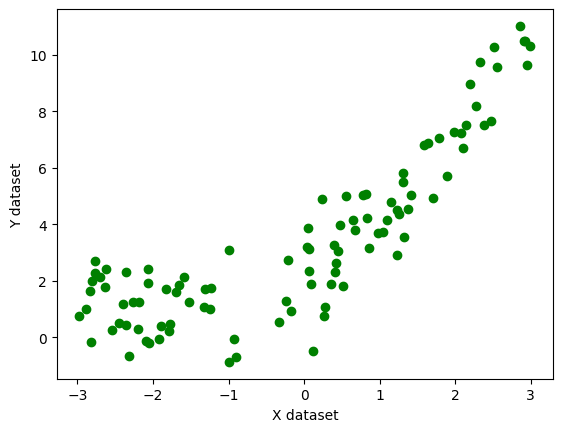

In [9]:
plt.scatter(X,Y,color="g")
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [10]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.3,random_state=42)
X_TRAIN

array([[-1.88960303],
       [ 0.44771931],
       [ 0.06138394],
       [ 1.88713685],
       [ 2.27657936],
       [ 2.09907374],
       [-2.40148465],
       [-1.8225361 ],
       [-0.17309231],
       [ 0.09459604],
       [ 0.11290174],
       [ 1.26418451],
       [ 2.14653467],
       [ 1.42229654],
       [ 1.98485916],
       [ 2.38013474],
       [ 0.41443276],
       [ 0.27425907],
       [ 2.20338684],
       [ 2.99737409],
       [ 1.31215681],
       [ 2.95758562],
       [-1.24988166],
       [-2.05980675],
       [ 0.51315172],
       [ 0.82249681],
       [-0.20929604],
       [-2.35695819],
       [-2.64108517],
       [ 2.9109003 ],
       [-1.78103046],
       [-0.90161498],
       [-2.35858965],
       [-2.26491373],
       [-0.99534719],
       [ 0.41959652],
       [ 2.92880695],
       [ 0.98381264],
       [ 0.86379721],
       [ 1.71276995],
       [-0.32532176],
       [-0.92194587],
       [ 1.1034413 ],
       [-1.69069924],
       [-2.76202616],
       [ 1

In [11]:
## let's implement simple linear regression 
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()
regression_1.fit(X_TRAIN,Y_TRAIN)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
## genrally scaling is not needed in many data and it's models 
from sklearn.metrics import r2_score
score=r2_score(Y_TEST,regression_1.predict(X_TEST))
print(score)                                 

0.6679019047611181


Text(0, 0.5, 'Y')

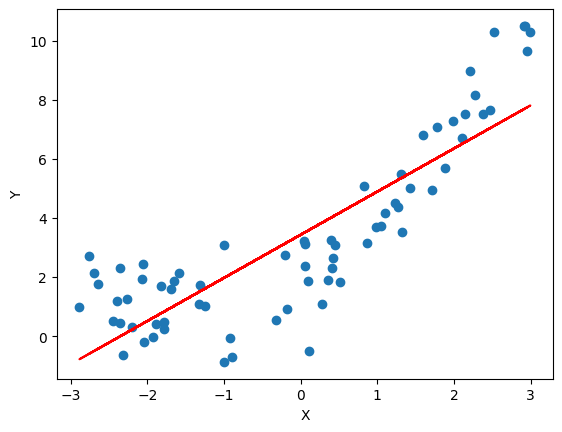

In [13]:
# let's visualise this model 
plt.plot(X_TRAIN,regression_1.predict(X_TRAIN),color="r")
plt.scatter(X_TRAIN,Y_TRAIN)
plt.xlabel("X")
plt.ylabel("Y")


In [14]:
#### let's apply polynomial transformation 
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_TRAIN_poly=poly.fit_transform(X_TRAIN)
X_TEST_poly=poly.fit_transform(X_TEST)


In [15]:
X_TRAIN_poly

array([[ 1.00000000e+00, -1.88960303e+00,  3.57059960e+00],
       [ 1.00000000e+00,  4.47719310e-01,  2.00452581e-01],
       [ 1.00000000e+00,  6.13839393e-02,  3.76798800e-03],
       [ 1.00000000e+00,  1.88713685e+00,  3.56128549e+00],
       [ 1.00000000e+00,  2.27657936e+00,  5.18281360e+00],
       [ 1.00000000e+00,  2.09907374e+00,  4.40611057e+00],
       [ 1.00000000e+00, -2.40148465e+00,  5.76712850e+00],
       [ 1.00000000e+00, -1.82253610e+00,  3.32163782e+00],
       [ 1.00000000e+00, -1.73092313e-01,  2.99609487e-02],
       [ 1.00000000e+00,  9.45960373e-02,  8.94841028e-03],
       [ 1.00000000e+00,  1.12901738e-01,  1.27468025e-02],
       [ 1.00000000e+00,  1.26418451e+00,  1.59816248e+00],
       [ 1.00000000e+00,  2.14653467e+00,  4.60761107e+00],
       [ 1.00000000e+00,  1.42229654e+00,  2.02292746e+00],
       [ 1.00000000e+00,  1.98485916e+00,  3.93966589e+00],
       [ 1.00000000e+00,  2.38013474e+00,  5.66504140e+00],
       [ 1.00000000e+00,  4.14432762e-01

In [16]:
## include Bias parameter 
from sklearn.metrics import r2_score
regression_1=LinearRegression()
regression_1.fit(X_TRAIN_poly,Y_TRAIN)
y_pred=regression_1.predict(X_TEST_poly)
score=r2_score(Y_TEST,y_pred)
print(score)

0.8219556237681712


In [17]:
print(regression_1.coef_)
print(regression_1.intercept_)

[[0.         1.46998556 0.50059689]]
[1.87522876]


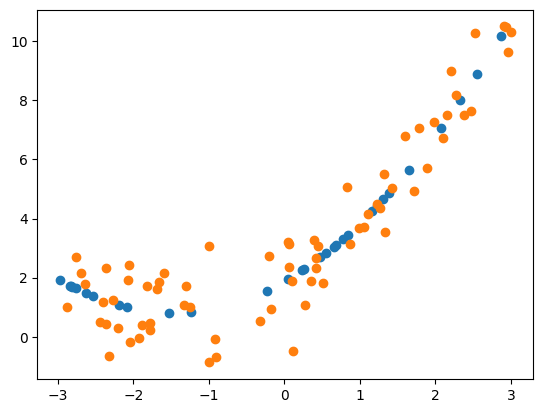

In [18]:
plt.scatter(X_TEST,regression_1.predict(X_TEST_poly))
plt.scatter(X_TRAIN,Y_TRAIN)

Text(0, 0.5, 'Y')

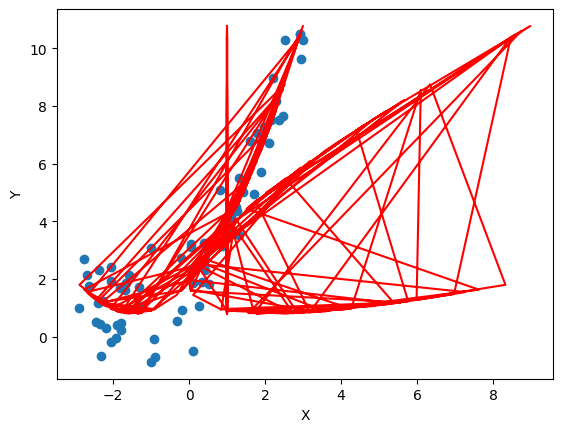

In [19]:
plt.plot(X_TRAIN_poly,regression_1.predict(X_TRAIN_poly),color="r")
plt.scatter(X_TRAIN,Y_TRAIN)
plt.xlabel("X")
plt.ylabel("Y")


# Pipeline in Polynomial 
## Why do we use a Pipeline in Polynomial Regression (and other models)?

### Because polynomial regression involves multiple sequential steps, not just model fitting.
What problems does a Pipeline solve?

Avoids data leakage

Transformation must be fitted only on training data, not on test data.

Pipeline ensures correct procedure automatically.

Ensures consistent preprocessing

Training and testing both get identical transformations.

No mismatch in polynomial features, scaling, etc.

Cleaner and easier code

Instead of writing multiple steps manually, everything is one object.

Works perfectly with Cross Validation

CV splits must apply preprocessing inside each fold.

With pipeline, CV doesn’t leak information across folds.

Easy hyperparameter tuning

GridSearchCV works smoothly on pipeline parameters.

In [ ]:
# PolynomialFeatures(
#     degree= ,            # controls polynomial order (core hyperparameter)
#     interaction_only= ,  # only interaction terms or include squares, cubes etc.
#     include_bias=        # add column of 1’s for intercept
# )


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def poly_regression(X_train, Y_train, X_test, Y_test, degree):
    # Create a range of values for smooth prediction curve
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    # Create a pipeline for polynomial regression
    ### it is using polynomialFeatures to convert the original features into higher order polynomial features 
    poly_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=True)),
        ("lin_reg", LinearRegression())
    ])
    
    # Fit the model
    poly_regression.fit(X_train, Y_train)
    
    # Predict using the trained model
    y_pred_new = poly_regression.predict(X_new)
    
    # Plot results
    plt.figure(figsize=(8,6))
    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}", linewidth=2.5)
    plt.scatter(X_train, Y_train, color='blue', label="Train Data")
    plt.scatter(X_test, Y_test, color='green', label="Test Data")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Polynomial Regression (Degree = {degree})")
    plt.axis([-4, 4, 0, 10])
    plt.show()


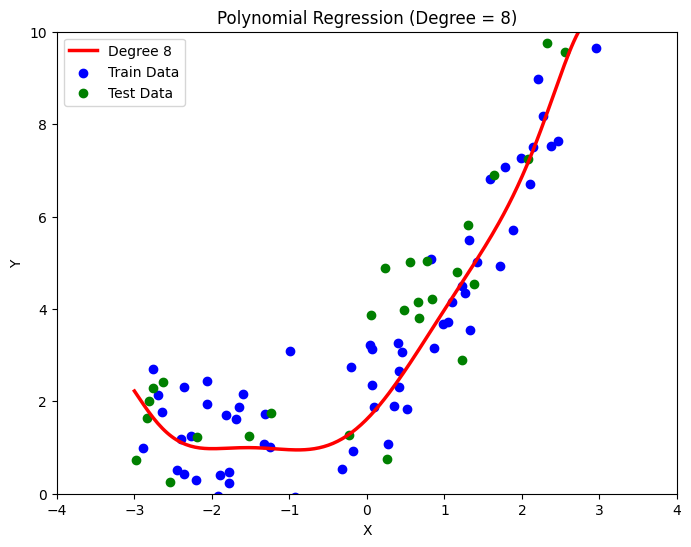

In [37]:
poly_regression(X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, 8)
